In [2]:
#Ivan Qiu BSAN 360 Project

In [477]:
#Question 1

import pandas as pd

df = pd.read_csv("Coffe_sales 2.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [478]:
#Question 2

rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 3547
Number of columns: 11


In [479]:
#Question 3

print(df.head())
print(df.tail())

#The output looks correct to me

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
      hour_of_day cash_type  money coffee_name Time_of_Day Weekday Month_name  \
3542           10      card  35.76  Cappuccino     Morning     Sun        Mar   
3543     

In [480]:
#Question 4

print(df.columns)
print(df.index)

#The column and rows labels did get processed correctly

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')
RangeIndex(start=0, stop=3547, step=1)


In [481]:
#Question 5

print(df.describe())
print(df.info())

#Part A: 
# Column 1: hour_of_day – The hour of the days

# Column 2: cash_type – The method of payment used (cash or card).

#Column 3: money – The amount of money spent

#Column 4: coffee_name – type or flavour

#Column 5: Time_of_Day – morning, evening etc

#Column 6: Weekday – day of the week

#Column 7: Month_name – name of the month

#Column 8: Weekdaysort – sorting of week days

#Column 9: Monthsort – sorting of months

#Column 10: Date – exact date

#Column 11: Time – exact time 


#Part B:
#Column 1: Integer

#Column 2: String

#Column 3: Integer

#Column 4: String

#Column 5: String

#Column 6: String

#Column 7: String

#Column 8: Integer

#Column 9: Integer

#Column 10: Datetime 

#Column 11: Datetime 


#Part C: These are all reasonable numbers


#Part D: There are no missing vlaues


       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   o

In [482]:
#Question 6:

#How do sales trends vary by day of the week or time of day?
# Columns that will be looked at is Weekday, Weekdaysort, hour_of_day, Time_of_Day, money
#What payment methods are most commonly used, and do they correlate with purchase amount or frequency?
# Columns that will be looked at is Cash_type, money



In [483]:
#Question 7:

#Question 1
sales_trends_df = df[['Weekday', 'Weekdaysort', 'hour_of_day', 'Time_of_Day', 'money']]

#Question 2
payment_df = df[['cash_type', 'money']]

In [484]:
#Question 8:
#Data set Question 1: Time series, because it analyze differences in average or total sales by weekday or time of day
#Data set Question 2: ANOVA because it test if differences are statistically significant

In [485]:
#Week 6 Project Assignment 2:

In [486]:
#Data Cleaning and Preperation

import pandas as pd
from pandas.api.types import CategoricalDtype

# Convert Time column (handles 12-hr or 24-hr formats)
df["Time"] = pd.to_datetime(df["Time"], errors="coerce").dt.time

# Drop rows where Time couldn’t be parsed
df = df.dropna(subset=["Time"])

# Convert object columns to categorical
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

# Ordered categories for Weekday and Month_name (if exist)
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

if "Weekday" in df.columns:
    df["Weekday"] = df["Weekday"].astype(CategoricalDtype(categories=weekday_order, ordered=True))

if "Month_name" in df.columns:
    df["Month_name"] = df["Month_name"].astype(CategoricalDtype(categories=month_order, ordered=True))

print(df.describe())
print(df.info())

       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   hour_of_day  3547 non-null   int64   
 1   cash_type    3547 non-null   category
 2   money        3547 non-null   float64 
 3   coffee_name  3547 non-null   category
 4   Time_of_Day  3547 non-null   category
 5   Weekday      3547 non-null   category
 6   Month_name   3547 non-

/var/folders/_r/49p0xhj11gq6q8cxv9_3tg1w0000gn/T/ipykernel_36601/741403578.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"], errors="coerce").dt.time


In [487]:
#Handling missing data:

df.isna().sum()
#There are no missing data. I inputed this code juust to double check if there are any missing data.

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [488]:
#Data Transformation: 

# Change column types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

#Remove duplicate rows and/or columns
df = df.drop_duplicates()

#Change units or add columns based on a mapping
bins = [0, 6, 12, 17, 21, 24]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['Time_Period'] = pd.cut(df['hour_of_day'], bins=bins, labels=labels, right=False, include_lowest=True)

#Replace value
df['cash_type'] = df['cash_type'].str.strip().str.lower().replace({'card ': 'card', 'cash ': 'cash'})
df['Weekday'] = df['Weekday'].str.strip().str.title()

#Re-label rows and/or columns
df = df.rename(columns={
    'money': 'Sales_Amount',
    'coffee_name': 'Drink_Type',
    'cash_type': 'Payment_Type'
})

#Discretize and bin continuous numerical data
Q1 = df['Sales_Amount'].quantile(0.25)
Q3 = df['Sales_Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Sales_Amount'] >= Q1 - 1.5*IQR) & (df['Sales_Amount'] <= Q3 + 1.5*IQR)]


#Detect and filter outliers
#I don't need to do this for my dataset

#Create a sample
#I don't need to create a sample

#Compute dummy or indicator columns for categorical variables
#I don't need to do this for my dataset

#Process columns with strings
df['Drink_Type'] = df['Drink_Type'].str.strip().str.title()
df['Time_of_Day'] = df['Time_of_Day'].str.strip().str.title()

# Convert all object columns (strings) to categorical
string_cols = df.select_dtypes(include="object").columns.tolist()
if "Time" in string_cols:
    string_cols.remove("Time")
df[string_cols] = df[string_cols].apply(lambda s: s.astype("category"))

print("Cleaned DataFrame preview:")
print(df.head())

print("\nColumn data types:")
print(df.dtypes)

Cleaned DataFrame preview:
   hour_of_day Payment_Type  Sales_Amount           Drink_Type Time_of_Day  \
0           10         card          38.7                Latte     Morning   
1           12         card          38.7        Hot Chocolate   Afternoon   
3           13         card          28.9            Americano   Afternoon   
4           13         card          38.7                Latte   Afternoon   
5           15         card          33.8  Americano With Milk   Afternoon   

  Weekday Month_name  Weekdaysort  Monthsort       Date Time Time_Period  
0     Fri        Mar            5          3 2024-03-01  NaT     Morning  
1     Fri        Mar            5          3 2024-03-01  NaT   Afternoon  
3     Fri        Mar            5          3 2024-03-01  NaT   Afternoon  
4     Fri        Mar            5          3 2024-03-01  NaT   Afternoon  
5     Fri        Mar            5          3 2024-03-01  NaT   Afternoon  

Column data types:
hour_of_day              int64
Pay

In [489]:
#Checks for duplicates:

df.duplicated()


0       False
1       False
3       False
4       False
5       False
        ...  
3541    False
3542    False
3543    False
3545    False
3546    False
Length: 2934, dtype: bool

In [490]:
any( df.duplicated() )

False

In [491]:
#Week 7 Project Assignment 3:

In [492]:
#Processing Strings

import pandas as pd

# Step 3: Process and clean string columns

# a. Remove leading/trailing white spaces and standardize case
df['Payment_Type'] = df['Payment_Type'].astype(str).str.strip().str.lower()
df['Drink_Type'] = df['Drink_Type'].astype(str).str.strip().str.title()
df['Time_of_Day'] = df['Time_of_Day'].astype(str).str.strip().str.title()
df['Weekday'] = df['Weekday'].astype(str).str.strip().str.title()
df['Month_name'] = df['Month_name'].astype(str).str.strip().str.title()

# b. Fix any inconsistent values
df['Payment_Type'] = df['Payment_Type'].replace({'card ': 'card', 'cash ': 'cash'})

# Step 4: Show cleaned text columns
print("Cleaned text columns preview:")
print(df[['Payment_Type', 'Drink_Type', 'Time_of_Day', 'Weekday', 'Month_name']].head())

Cleaned text columns preview:
  Payment_Type           Drink_Type Time_of_Day Weekday Month_name
0         card                Latte     Morning     Fri        Mar
1         card        Hot Chocolate   Afternoon     Fri        Mar
3         card            Americano   Afternoon     Fri        Mar
4         card                Latte   Afternoon     Fri        Mar
5         card  Americano With Milk   Afternoon     Fri        Mar


In [493]:
#Data Wrangling: Combining and Merging Datasets

#This part is not needed because my dataset uses only one data source. So there are no additional datasets to merge or join


In [494]:
#Data Wrangling: Reshaping and Pivoting

df = df.rename(columns={'money': 'Sales_Amount'})
pivot_df = df.pivot_table(
    index='Weekday',
    columns='Time_of_Day',
    values='Sales_Amount',
    aggfunc='mean'
)
print(pivot_df)


Time_of_Day  Afternoon    Morning      Night
Weekday                                     
Fri          32.022836  30.396407  32.498209
Mon          31.859865  31.063171  32.636691
Sat          32.448696  29.781240  32.613684
Sun          31.260584  30.850392  33.162524
Thu          30.866806  30.370000  33.030429
Tue          31.217664  30.865868  33.319018
Wed          31.379697  30.907972  32.636250


In [495]:
#Week 8 Project 4

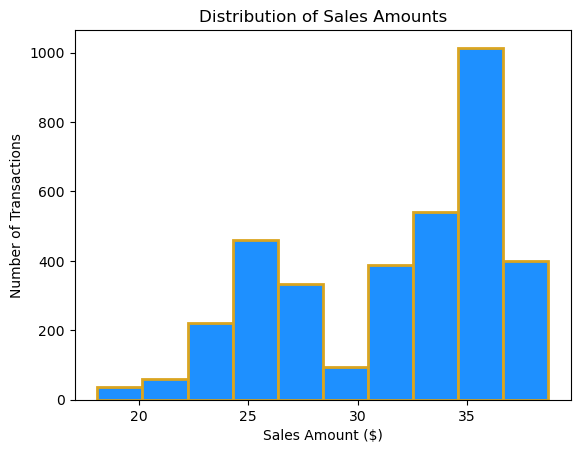

In [496]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Coffe_sales 2.csv")

# --- 1. Histogram of sales amounts ---
fig, ax = plt.subplots()
ax.hist(df['money'], bins=10, color='dodgerblue', edgecolor='goldenrod', linewidth=2)
ax.set_title("Distribution of Sales Amounts")
ax.set_xlabel("Sales Amount ($)")
ax.set_ylabel("Number of Transactions")
plt.show()



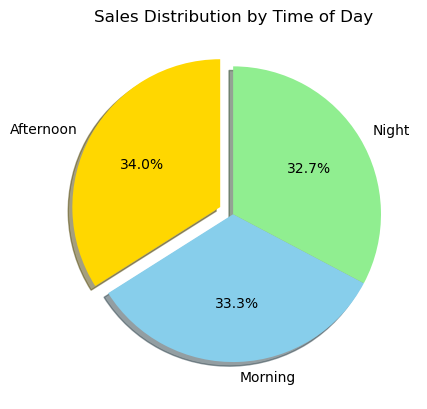

In [497]:
# Pie chart of sales by time of day
fig, ax = plt.subplots()

time_counts = df['Time_of_Day'].value_counts()

explode = [0.1] + [0]*(len(time_counts)-1)

ax.pie(time_counts, labels=time_counts.index,
       autopct='%1.1f%%', startangle=90,
       colors=['gold', 'skyblue', 'lightgreen', 'plum'][:len(time_counts)],
       explode=explode, shadow=True)

ax.set_title("Sales Distribution by Time of Day")
plt.show()

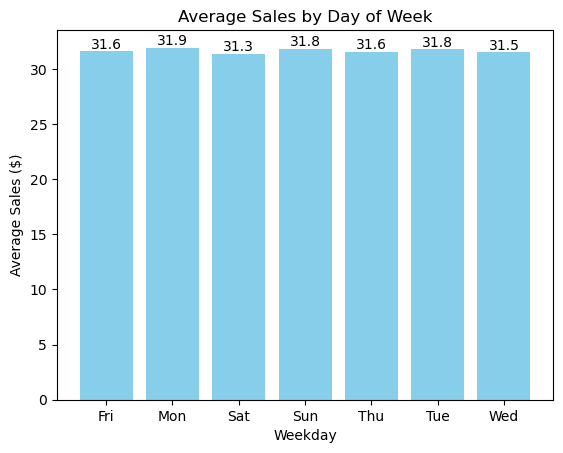

In [498]:
# 4. Bar chart of average sales by weekday 
fig, ax = plt.subplots()
avg_sales = df.groupby('Weekday')['money'].mean()
bars = ax.bar(avg_sales.index, avg_sales, color='skyblue')
ax.bar_label(bars, fmt='%.1f')
ax.set_title("Average Sales by Day of Week")
ax.set_xlabel("Weekday")
ax.set_ylabel("Average Sales ($)")
plt.show()


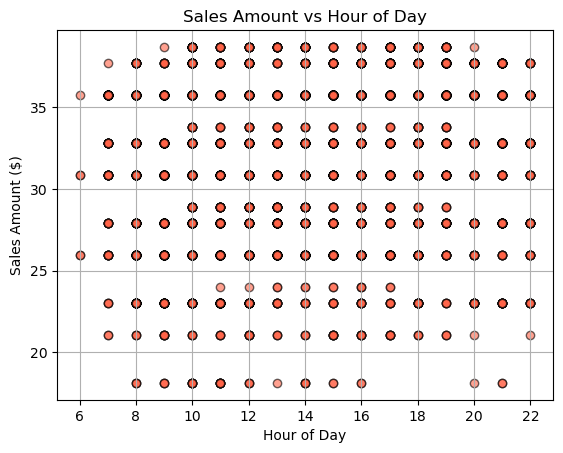

In [499]:
# 5. Scatter plot of sales amount vs hour of day 
fig, ax = plt.subplots()
ax.scatter(df['hour_of_day'], df['money'], color='tomato', alpha=0.6, edgecolor='black')
ax.set_title("Sales Amount vs Hour of Day")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Sales Amount ($)")
ax.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

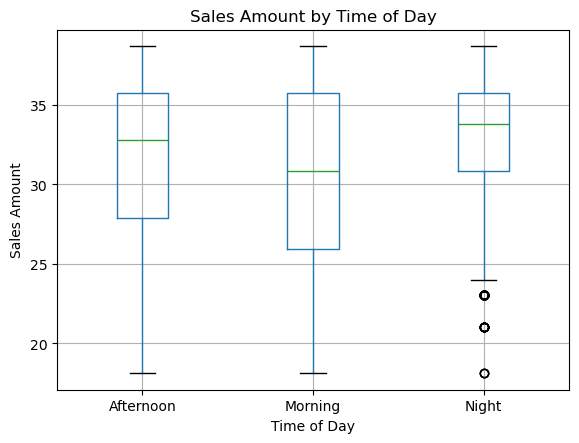

In [500]:
#Box plot

plt.figure(figsize=(8,5))
df.boxplot(column='money', by='Time_of_Day')

plt.title("Sales Amount by Time of Day")
plt.suptitle("")
plt.xlabel("Time of Day")
plt.ylabel("Sales Amount")
plt.show()

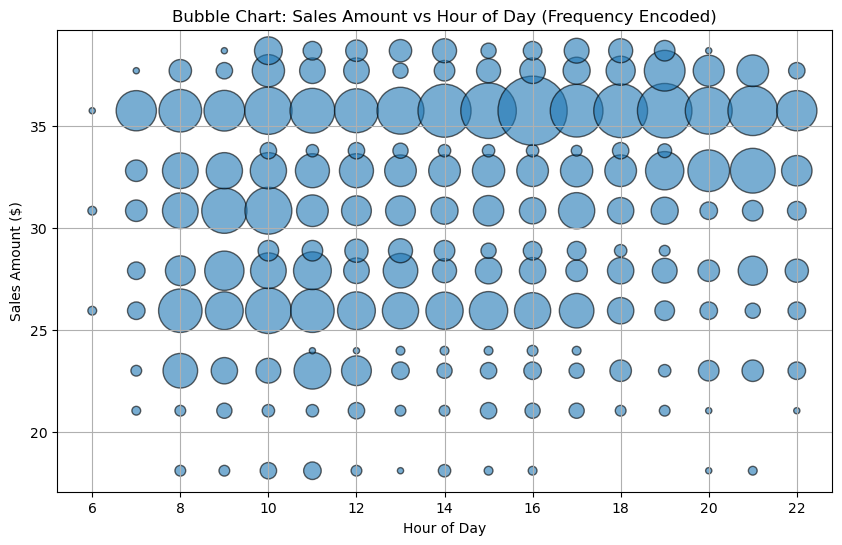

In [501]:
import pandas as pd
import matplotlib.pyplot as plt

# If you already have df, skip this line
df = pd.read_csv("Coffe_sales 2.csv")

# Count frequency of each (hour, sales amount) pair
bubble_df = df.groupby(["hour_of_day", "money"]).size().reset_index(name='count')

plt.figure(figsize=(10,6))
plt.scatter(
    bubble_df["hour_of_day"],
    bubble_df["money"],
    s=bubble_df["count"] * 20,   # bubble size (adjust multiplier as needed)
    alpha=0.6,
    edgecolor='black'
)

plt.title("Bubble Chart: Sales Amount vs Hour of Day (Frequency Encoded)")
plt.xlabel("Hour of Day")
plt.ylabel("Sales Amount ($)")
plt.grid(True)
plt.show()

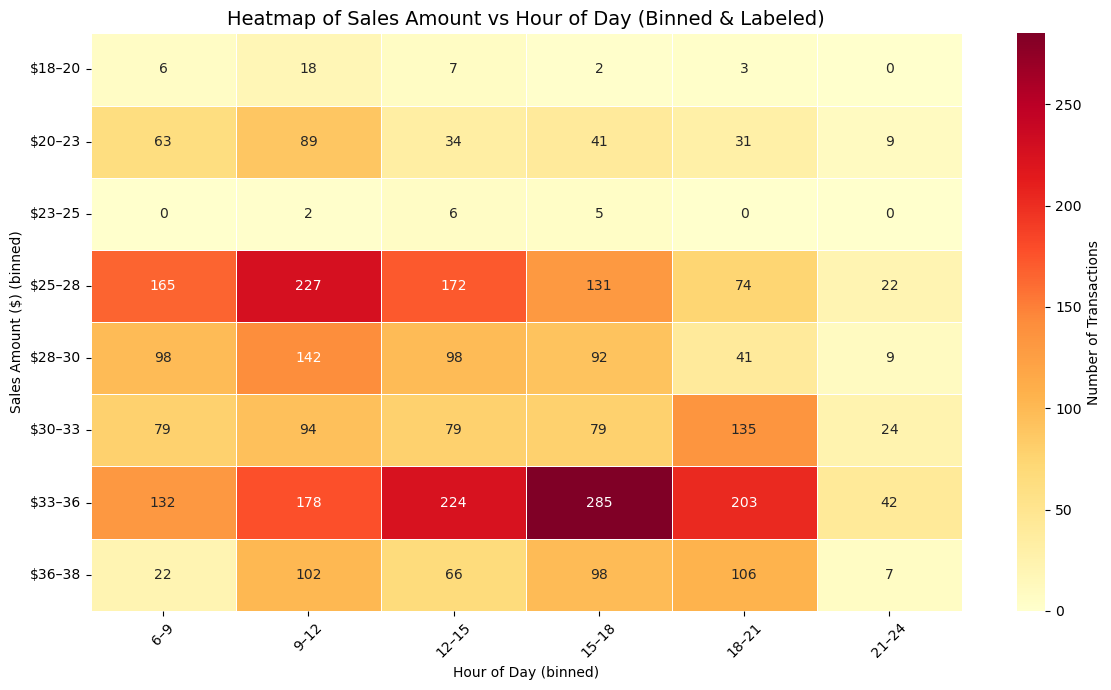

In [502]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Create binned versions of hour and sales amount ---
hour_bins = [6, 9, 12, 15, 18, 21, 24]   # Customize if needed
sales_bins = 8  # automatic 8 bins

df["hour_bin"] = pd.cut(df["hour_of_day"], bins=hour_bins)
df["sales_bin"] = pd.cut(df["money"], bins=sales_bins)

# --- Create frequency table (silencing warning) ---
heatmap_data = df.pivot_table(
    index="sales_bin",
    columns="hour_bin",
    values="money",
    aggfunc="count",
    observed=False
)

# --- Format labels for readability ---
heatmap_data.index = [f"${int(i.left)}–{int(i.right)}" for i in heatmap_data.index]
heatmap_data.columns = [f"{int(i.left)}–{int(i.right)}" for i in heatmap_data.columns]

plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=.5,
    annot=True,          # show numbers inside the boxes
    fmt=".0f",           # integer formatting
    cbar_kws={'label': 'Number of Transactions'}
)

plt.title("Heatmap of Sales Amount vs Hour of Day (Binned & Labeled)", fontsize=14)
plt.xlabel("Hour of Day (binned)")
plt.ylabel("Sales Amount ($) (binned)")

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [503]:
#Week 9 Project 5

In [504]:
#Data Aggregation and Group Operations: 


df = df.rename(columns={
    'money': 'Sales_Amount',
    'coffee_name': 'Drink_Type'
})

# Total sales
total_sales = df['Sales_Amount'].sum()
print("Total Sales:", total_sales)

# Average sale amount
avg_sale = df['Sales_Amount'].mean()
print("Average Sale Amount:", avg_sale)

# Total transactions per drink type
drink_counts = df['Drink_Type'].value_counts()
print("\nNumber of Transactions per Drink Type:")
print(drink_counts)



# 1) Grouping: summary statistics by Weekday, Time_of_Day, Payment_Type

if 'Sales_Amount' not in df.columns:
    if 'money' in df.columns:
        df = df.rename(columns={'money': 'Sales_Amount'})
    else:
        raise KeyError("Your dataset does not contain 'Sales_Amount' or 'money'.")

if 'Payment_Type' not in df.columns:
    if 'cash_type' in df.columns:
        df = df.rename(columns={'cash_type': 'Payment_Type'})
    else:
        raise KeyError("Your dataset does not contain 'Payment_Type' or 'cash_type'.")

week_summary = df.groupby('Weekday', sort=False)['Sales_Amount'].agg(['mean','median','count'])
time_summary = df.groupby('Time_of_Day', sort=False)['Sales_Amount'].agg(['mean','median','count'])
payment_summary = df.groupby('Payment_Type', sort=False)['Sales_Amount'].agg(['mean','median','count'])

print("Weekday summary:\n", week_summary, "\n")
print("Time_of_Day summary:\n", time_summary, "\n")
print("Payment_Type summary:\n", payment_summary, "\n")

Total Sales: 112245.57999999999
Average Sale Amount: 31.64521567521849

Number of Transactions per Drink Type:
Drink_Type
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64
Weekday summary:
               mean  median  count
Weekday                          
Fri      31.583947   32.82    532
Sat      31.347915   32.82    470
Sun      31.828305   32.82    419
Mon      31.917463   32.82    544
Tue      31.762902   32.82    572
Wed      31.500920   32.82    500
Thu      31.551765   32.82    510 

Time_of_Day summary:
                   mean  median  count
Time_of_Day                          
Morning      30.422693   30.86   1181
Afternoon    31.643187   32.82   1205
Night        32.890904   33.80   1161 

Payment_Type summary:
                    mean  median  count
Payment_Type                      

In [505]:
# 2) Apply / custom function example: top 3 transactions per Drink_Type

if 'Sales_Amount' not in df.columns:
    if 'money' in df.columns:
        df = df.rename(columns={'money': 'Sales_Amount'})
    else:
        raise KeyError("Your dataset does not contain 'Sales_Amount' or 'money'.")

if 'Drink_Type' not in df.columns:
    if 'coffee_name' in df.columns:
        df = df.rename(columns={'coffee_name': 'Drink_Type'})
    else:
        raise KeyError("Your dataset does not contain 'Drink_Type' or 'coffee_name'.")

# Custom function
def top_n(group, n=3):
    return group.sort_values('Sales_Amount', ascending=False).head(n)

top3_per_drink = df.groupby('Drink_Type', observed=False).apply(top_n, n=3, include_groups=False)

# Flatten index
top3_per_drink = top3_per_drink.reset_index(drop=True)

print("Top 3 transactions per Drink_Type (flattened):\n", top3_per_drink.head(15), "\n")

Top 3 transactions per Drink_Type (flattened):
     hour_of_day Payment_Type  Sales_Amount Time_of_Day Weekday Month_name  \
0            13         card          28.9   Afternoon     Fri        Mar   
1            10         card          28.9     Morning     Thu        Apr   
2            13         card          28.9   Afternoon     Tue        Mar   
3            15         card          33.8   Afternoon     Fri        Mar   
4            18         card          33.8       Night     Mon        Mar   
5            12         card          33.8   Afternoon     Wed        Mar   
6            14         card          38.7   Afternoon     Wed        Mar   
7            10         card          38.7     Morning     Mon        Apr   
8            19         card          38.7       Night     Mon        Apr   
9            19         card          38.7       Night     Fri        Mar   
10           17         card          38.7       Night     Tue        Mar   
11           16         card

In [506]:
# Grouping Data:

# Average sales by weekday
avg_sales_by_day = df.groupby('Weekday')['Sales_Amount'].mean()
print("\nAverage Sales by Weekday:")
print(avg_sales_by_day)

# Total sales by time of day
sales_by_time = df.groupby('Time_of_Day')['Sales_Amount'].sum()
print("\nTotal Sales by Time of Day:")
print(sales_by_time)

# Payment type summary (how many card vs cash)
payment_summary = df.groupby('Payment_Type').size()
print("\nTransaction Count by Payment Type:")
print(payment_summary)





Average Sales by Weekday:
Weekday
Fri    31.583947
Mon    31.917463
Sat    31.347915
Sun    31.828305
Thu    31.551765
Tue    31.762902
Wed    31.500920
Name: Sales_Amount, dtype: float64

Total Sales by Time of Day:
Time_of_Day
Afternoon    38130.04
Morning      35929.20
Night        38186.34
Name: Sales_Amount, dtype: float64

Transaction Count by Payment Type:
Payment_Type
card    3547
dtype: int64


In [507]:
# Pivot Tables

#(This is added on the top already)


In [508]:
# 4) Cross-tabulation: counts of Payment_Type by Time_of_Day and Drink_Type by Weekday

ct_payment_time = pd.crosstab(df['Payment_Type'], df['Time_of_Day'], margins=True)
ct_drink_week = pd.crosstab(df['Drink_Type'], df['Weekday'], margins=True)

print("Crosstab Payment_Type x Time_of_Day:\n", ct_payment_time, "\n")
print("Crosstab Drink_Type x Weekday (first 10 rows):\n", ct_drink_week.head(10), "\n")

Crosstab Payment_Type x Time_of_Day:
 Time_of_Day   Afternoon  Morning  Night   All
Payment_Type                                 
card               1205     1181   1161  3547
All                1205     1181   1161  3547 

Crosstab Drink_Type x Weekday (first 10 rows):
 Weekday              Fri  Mon  Sat  Sun  Thu  Tue  Wed   All
Drink_Type                                                  
Americano            105   93   69   46   82   81   88   564
Americano with Milk  103  128  120   99  103  143  113   809
Cappuccino            62   71   69   70   77   63   74   486
Cocoa                 52   34   23   24   23   57   26   239
Cortado               37   35   56   42   42   44   31   287
Espresso              21   10   14   16   27   16   25   129
Hot Chocolate         45   35   24   40   48   49   35   276
Latte                107  138   95   82  108  119  108   757
All                  532  544  470  419  510  572  500  3547 



In [509]:
# Week 11 Project 6

Date
2024-03-01    396.3
2024-03-02    188.1
2024-03-03    309.1
2024-03-04    135.2
2024-03-05    338.5
Freq: D, Name: Sales_Amount, dtype: float64
Date
2024-03-03     893.50
2024-03-10    1545.50
2024-03-17    1191.30
2024-03-24    1047.80
2024-03-31    1227.10
2024-04-07    1134.50
2024-04-14    1256.00
2024-04-21    1625.84
2024-04-28    1173.20
2024-05-05     812.18
2024-05-12    1530.80
2024-05-19    1918.26
2024-05-26    2544.80
2024-06-02    2415.00
2024-06-09    2075.52
2024-06-16    1835.98
2024-06-23    1911.42
2024-06-30    1268.24
2024-07-07    1475.42
2024-07-14     876.80
2024-07-21     998.28
2024-07-28    1959.30
2024-08-04    2625.96
2024-08-11    2111.66
2024-08-18    2266.42
2024-08-25    1519.42
2024-09-01     990.42
2024-09-08    2443.74
2024-09-15    1761.92
2024-09-22    2581.40
2024-09-29    2480.54
2024-10-06    2654.48
2024-10-13    3162.94
2024-10-20    3662.64
2024-10-27    2956.72
2024-11-03    2800.96
2024-11-10    2450.24
2024-11-17    2408.12
2024-11-24

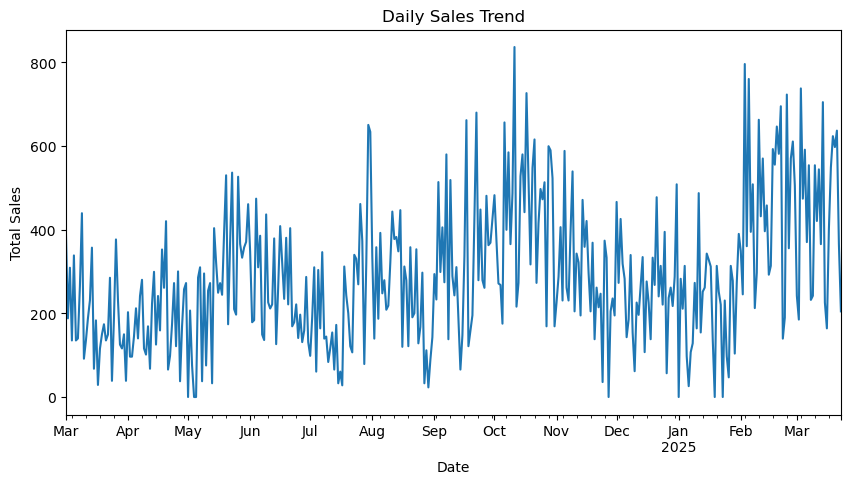

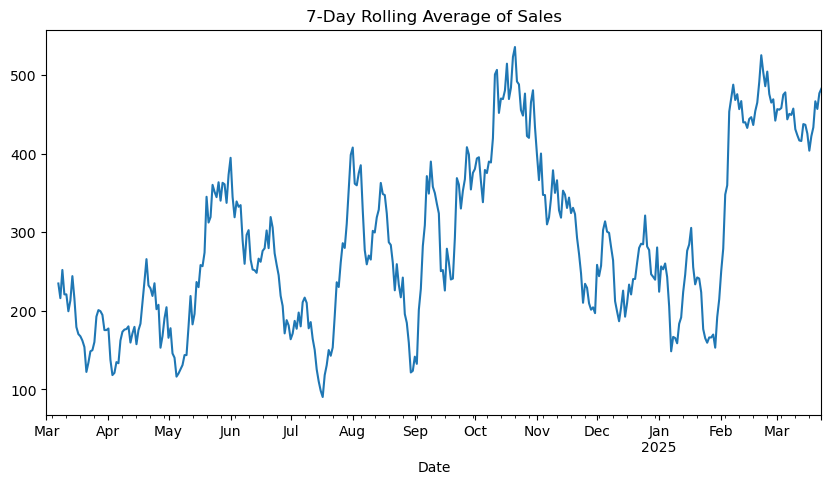

In [510]:
#Time Series Analysis: 

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_sales = df['Sales_Amount'].resample('D').sum()
print(daily_sales.head())

weekly_sales = df['Sales_Amount'].resample('W').sum()
print(weekly_sales)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


rolling_avg = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(10,5))
rolling_avg.plot()
plt.title("7-Day Rolling Average of Sales")
plt.show()

In [511]:
#ANOVA

from scipy import stats

# One-way ANOVA for Sales Amount across different Times of Day

morning_group = df[df["Time_of_Day"] == "Morning"]["Sales_Amount"]
afternoon_group = df[df["Time_of_Day"] == "Afternoon"]["Sales_Amount"]
night_group = df[df["Time_of_Day"] == "Night"]["Sales_Amount"]

# Run ANOVA
anova_result = stats.f_oneway(morning_group, afternoon_group, night_group)

print("ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Results:
F-statistic: 78.21775635057196
p-value: 5.738878249433681e-34


In [ ]:
#JSON Data is not relevant to my sort of research.